In [ ]:
# General imports
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import torch
import joblib

# Scikit-learn imports for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

# Transformers and sentence embeddings
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

In [ ]:
# Sadness Dataset

loss = [
    "I miss my loved one so much it hurts",
    "They are gone and I feel empty inside",
    "I cry when I think about them",
    "Life is not the same without them",
    "I still wait for them to come back, even though I know they won’t",
    "It feels like a piece of my heart is missing",
    "Every memory makes me tear up",
    "I keep looking at their pictures and crying",
    "I feel so alone since they passed away",
    "I pray for them every day because I miss them so much",
    "I still talk to them in my heart",
    "I cannot accept that they are no longer here",
    "I wish I had more time with them",
    "Everything reminds me of them",
    "My home feels empty without them",
    "I feel lost after their death",
    "I do not know how to move forward",
    "I try to be strong but I break down often",
    "I feel like no one understands my pain",
    "I ask Allah to reunite us in Jannah",
    "Every corner of my house feels haunted by their absence",
    "I keep hearing their voice in my head",
    "Losing them feels like losing a part of myself",
    "I still expect them to walk through the door",
    "Some days I forget they are gone and the reminder crushes me",
    "Their favorite chair now sits untouched",
    "I keep rereading old messages just to feel close to them",
    "The world feels dimmer without them in it",
    "I did not get a chance to say goodbye",
    "I struggle to believe they are really not coming back",
    "I smile at old memories and then cry because they are over",
    "I feel like time stopped the day they left",
    "I hold on to their belongings like they might return",
    "I whisper their name when I pray",
    "Grief hits me in unexpected waves",
    "I never imagined life without them",
    "Holidays feel empty now",
    "I feel like I am grieving alone",
    "There is an ache in my chest I cannot explain",
    "I visit their grave and talk to them like they are still here"
]

failure = [
    "I tried so hard and still failed",
    "I feel like I let everyone down",
    "Nothing I do seems to work out",
    "I feel useless and not good enough",
    "I keep making the same mistakes",
    "I feel like a failure in life",
    "I am disappointed in myself",
    "I worked hard but got no results",
    "I keep falling no matter how much I try",
    "I feel embarrassed by my failures",
    "I cannot meet people’s expectations",
    "I feel stuck and hopeless",
    "Everyone is moving forward except me",
    "I lost something important to me",
    "I am afraid to try again",
    "I feel weak when I cannot succeed",
    "I ask Allah to help me through my failures",
    "I feel like I keep ruining things",
    "I want to give up but I keep praying",
    "No one sees how much I struggle and fail",
    "I gave it my all and still I could not make it work",
    "I failed again and it is crushing my confidence",
    "I thought I was improving but I keep falling short",
    "No matter how hard I push myself I end up losing",
    "I feel defeated by my repeated mistakes",
    "I keep chasing success but it keeps slipping away",
    "I let my family down with my poor performance",
    "I do not know how many more failures I can handle",
    "I always start with hope but end with regret",
    "My efforts never seem to lead to results",
    "I hate feeling like I am not good at anything",
    "Every setback makes me question my worth",
    "It is exhausting to keep failing at things I care about",
    "Even when I prepare I find a way to mess it up",
    "I cannot stop thinking about how badly I did",
    "Failing makes me fear trying anything new",
    "I feel ashamed of not living up to expectations",
    "I thought I was strong enough but I was not",
    "My failures keep piling up and weighing me down",
    "I wish I could turn back time and do things right"
]

loneliness = [
    "I feel alone even when people are around",
    "No one really understands me",
    "I have no one to talk to",
    "I feel like I do not matter to anyone",
    "It feels like no one sees me",
    "I wish someone would ask how I am doing",
    "I feel lonely in every place I go",
    "I keep everything inside because no one listens",
    "I feel like I am by myself all the time",
    "I feel far from the people around me",
    "I miss having someone to talk to",
    "I want someone who truly cares",
    "I wish I had a real friend",
    "I feel like I do not fit in anywhere",
    "Most of my days are quiet and empty",
    "I feel like people have forgotten me",
    "I talk to Allah when no one else is there",
    "I ask Allah to send someone who understands me",
    "I cry when I am alone",
    "I feel disconnected from everything",
    "I sit alone with my thoughts for hours",
    "I feel invisible in crowded rooms",
    "I wake up and realize I have no one to message",
    "I eat alone every day and it hurts",
    "No one checks in on me and it makes me feel forgotten",
    "I keep hoping someone will notice I am not okay",
    "I scroll through my contacts and do not know who to call",
    "I pretend I am fine because I have no one to confide in",
    "I feel like I drift through life alone",
    "I go entire days without speaking to anyone",
    "I feel a deep emptiness in my chest",
    "I keep smiling so no one knows how alone I feel",
    "Sometimes I talk out loud just to fill the silence",
    "I feel like an outsider everywhere I go",
    "People pass by me like I do not exist",
    "I feel disconnected from the world around me",
    "My phone stays silent all day and night",
    "I wish I had someone who waited to hear from me",
    "I feel isolated even with internet and messages",
    "I ask Allah to bring someone into my life who understands my silence"
]

rejection = [
    "They left me and it really hurt",
    "I feel like no one wants me",
    "They stopped talking to me for no reason",
    "I feel like I do not belong anywhere",
    "I gave my heart and they did not care",
    "Everyone moves on and I am left behind",
    "I trusted them but they walked away",
    "They forgot about me like I did not matter",
    "I always feel like I get left out",
    "I wish they stayed with me",
    "I feel like I am not enough for anyone",
    "They said they would be there, but they left",
    "I gave them everything and still got hurt",
    "I feel like they used me and walked away",
    "They left without even saying goodbye",
    "I stayed loyal but they gave up on me",
    "I ask Allah to heal me from this pain",
    "I do not know why they left me like this",
    "I feel like I was never truly loved",
    "I pray that Allah stays with me when others leave",
    "They turned away when I needed them most",
    "I opened up and they walked away like it meant nothing",
    "It feels like no one chooses me",
    "I try to connect but always end up being ignored",
    "I give love and get silence in return",
    "I offered my loyalty and was met with distance",
    "I was left behind without explanation",
    "I feel like I was never good enough for them",
    "They replaced me like I never mattered",
    "I gave everything and still they left me alone",
    "I feel discarded by people I trusted",
    "I keep wondering what I did wrong to be left like this",
    "They disappeared from my life without a word",
    "I feel abandoned in every relationship I build",
    "I get close and then people just drift away",
    "They promised to stay but left when it got hard",
    "I feel like I am always the one being left out",
    "I was excluded without any reason",
    "It hurts to know they never truly valued me",
    "I ask Allah to fill the void others leave behind"
]

emotional_overwhelm = [
    "I feel really heavy inside but I do not know why",
    "My heart feels tired all the time",
    "Sometimes I cry and I do not even know why",
    "Everything feels like too much",
    "I feel like my emotions are too big for me",
    "I do not feel like myself these days",
    "I cannot stop feeling sad",
    "I smile in front of people but I feel broken inside",
    "I try to stay strong but I am so tired",
    "I feel like I am drowning in my thoughts",
    "I want peace in my heart but it is not coming",
    "I pray that Allah makes my heart feel lighter",
    "I feel sad even when nothing is wrong",
    "I feel like I am falling apart inside",
    "It is hard to stay hopeful sometimes",
    "I feel like I carry too much pain",
    "My mind never stops and it wears me out",
    "I just want to feel normal again",
    "I ask Allah to take this sadness away",
    "I do not understand why I feel like this",
    "My thoughts keep spinning and I cannot slow them down",
    "I feel like I am carrying an invisible weight",
    "Everything feels like it is crashing down at once",
    "I am overwhelmed by feelings I cannot even name",
    "I cannot focus because my emotions are in the way",
    "I feel like I am constantly on the edge of breaking",
    "It is like I am drowning in my own mind",
    "I want to cry scream and sleep all at once",
    "My emotions are too loud and I cannot silence them",
    "I feel like my heart is always racing from stress",
    "I wish I could pause life just to breathe",
    "I keep pretending I am okay but I am not",
    "Some days even getting out of bed feels impossible",
    "I feel like I am losing control over myself",
    "I am exhausted but my mind will not rest",
    "I get irritated easily because I am emotionally drained",
    "I do not know what I need I just know I am not okay",
    "I am so full of emotion that it is hard to function",
    "I am silently battling feelings that no one sees",
    "I keep asking Allah to bring ease to my heart"
]

s_texts = loss + failure + loneliness + rejection + emotional_overwhelm
s_labels = (
    ["loss"] * len(loss) +
    ["failure"] * len(failure) +
    ["loneliness"] * len(loneliness) +
    ["rejection"] * len(rejection) +
    ["emotional_overwhelm"] * len(emotional_overwhelm)
)

df = pd.DataFrame({
    'sadness_text': s_texts,
    'sadness_label': s_labels
})

# Save to CSV
df.to_csv('sadness_dataset.csv', index=False)

In [ ]:
# Anxiety Dataset

fear_of_future = [
    "I am scared of what might happen next",
    "I do not know where my life is going",
    "The future makes me really nervous",
    "I feel lost when I think about what is ahead",
    "I cannot stop worrying about tomorrow",
    "It feels like everything could fall apart anytime",
    "I wish I could see what is coming so I could prepare",
    "Not knowing the future makes me feel helpless",
    "I get anxious when I think about my plans",
    "The thought of change makes me panic",
    "I feel stuck and do not know what to do next",
    "I worry that I will fail at everything",
    "There is so much pressure to figure things out",
    "I feel like I am falling behind in life",
    "I am scared things will not work out for me",
    "The unknown makes me freeze inside",
    "I try to plan everything just to feel in control",
    "Even small changes make me feel uneasy",
    "I always imagine the worst happening",
    "I pray things go well, but I am still nervous",
    "I worry I will never figure out my purpose in life",
    "I fear that time is running out for me to succeed",
    "I get chills thinking about everything that could go wrong",
    "I dread what the next year might bring",
    "I feel unprepared for what lies ahead",
    "I fear that no matter what I do, it won’t be enough",
    "I constantly question if I am on the right path",
    "I am scared I will end up alone and lost",
    "I freeze when I try to think about my long-term goals",
    "I feel like my life is one big uncertainty",
    "I overthink the consequences of every future decision",
    "I get overwhelmed imagining how things could spiral",
    "I worry the world is changing too fast for me",
    "I feel paralyzed by the choices I have to make",
    "I fear that nothing I plan will work out",
    "The pressure of the future makes me want to hide",
    "I feel like I’m walking into the dark with no light",
    "I can’t picture a future where I am okay",
    "I wish time would stop so I didn’t have to deal with what’s next",
    "Every step forward feels like a gamble I might lose"
]

social_anxiety = [
    "I get nervous talking to people I do not know",
    "I overthink everything I say in conversations",
    "I feel shy and awkward in groups",
    "I worry people will judge me",
    "I feel like I do not fit in",
    "Meeting new people makes me feel sick inside",
    "I always feel like I said something wrong",
    "I avoid calls or events because of anxiety",
    "I stay quiet because I do not want to mess up",
    "I replay social situations in my head over and over",
    "I feel uncomfortable when all eyes are on me",
    "I avoid speaking even when I want to",
    "I am scared to make the first move in conversations",
    "I worry people do not like me",
    "I get anxious before even leaving the house",
    "I feel like people are laughing at me",
    "I want to be social but it is so hard",
    "I feel so drained after talking to people",
    "I try to hide my nervousness but it shows",
    "I pray I do not have to talk in front of others",
    "I rehearse what to say before even texting someone",
    "I feel exposed when I speak in public spaces",
    "I avoid eye contact because it makes me nervous",
    "I feel like everyone is silently judging me",
    "I dread group introductions and small talk",
    "I cancel plans last minute because of anxiety",
    "I get overwhelmed by social noise and chatter",
    "I feel invisible but also afraid of being seen",
    "I think about how I sound long after I talk",
    "I pretend to be busy to avoid social situations",
    "I am terrified of awkward silences",
    "I avoid asking questions so I don’t seem dumb",
    "I worry I come off as boring or weird",
    "I feel drained after interacting with people, even friends",
    "I freeze up when I have to introduce myself",
    "I feel like I do not know how to be normal around others",
    "I get scared when someone new tries to talk to me",
    "I stay quiet in groups even if I have something to say",
    "I feel like my nervousness makes people uncomfortable",
    "I fear being laughed at or ignored by others"
]

performance_anxiety = [
    "I get really nervous before speaking in front of people",
    "My heart races when I have to perform or present",
    "I feel like everyone is watching and judging me",
    "I start shaking when I am under pressure",
    "I feel sick before any big test or task",
    "What if I mess up in front of everyone",
    "I panic when I have to perform well",
    "I feel like I will embarrass myself",
    "I keep thinking about failing in front of others",
    "I get anxious even practicing for something important",
    "I feel pressure to be perfect",
    "I cannot focus because I am too nervous",
    "I always doubt myself right before something big",
    "I feel like I am not good enough to succeed",
    "I stress over every little detail when performing",
    "Even the thought of presenting makes me feel sick",
    "I want to do well but my anxiety gets in the way",
    "My mind goes blank when I am in the spotlight",
    "I feel frozen when people expect things from me",
    "I worry more about failing than trying",
    "I dread job interviews more than anything",
    "My hands sweat before every performance",
    "I feel like all eyes are waiting for me to slip up",
    "I review every line I will say over and over",
    "I panic before handing in any assignment",
    "I feel like I need to be flawless to be accepted",
    "I get sick to my stomach before every presentation",
    "I question my abilities whenever I am tested",
    "I feel like I disappoint people when I don’t do well",
    "I break down under the weight of expectations",
    "I feel like failure means I am not worth anything",
    "I stay up all night worrying about the next big thing",
    "I doubt my preparation even when I work hard",
    "I fear freezing mid-performance or forgetting everything",
    "I compare myself to others and feel I fall short",
    "I get nervous just being watched while doing something",
    "I push myself too hard and still feel it’s not enough",
    "I obsess over making mistakes in front of others",
    "I feel like one error will ruin everything",
    "I wish I could perform without the fear crushing me"
]

health_anxiety = [
    "Every small pain makes me think something is wrong",
    "I keep checking my body for symptoms",
    "I am scared I might have a serious illness",
    "I look up my symptoms online and it scares me more",
    "I cannot stop thinking about my health",
    "I worry about getting sick all the time",
    "I think something is wrong even if doctors say I am fine",
    "I get nervous before every check-up",
    "I panic if I feel anything unusual in my body",
    "I feel like no one believes how I feel",
    "I am always scared I will suddenly get sick",
    "I worry that I will not catch something early enough",
    "Even normal pain makes me overthink",
    "I feel like I need constant health reassurance",
    "I get scared when others talk about diseases",
    "I cannot relax when I feel something off in my body",
    "I always think the worst about my symptoms",
    "I check my heartbeat or breathing too much",
    "I feel anxious after reading health news",
    "I ask Allah to keep me healthy but still worry",
    "I check my temperature even when I feel fine",
    "I avoid hospitals because they trigger my fears",
    "I fear that I’m missing a hidden illness",
    "I panic when someone near me sneezes",
    "I feel dizzy and instantly think it’s serious",
    "I check my skin for any new marks every day",
    "I feel like something is always wrong inside me",
    "I overanalyze every sensation in my body",
    "I fear going to sleep in case I don’t wake up",
    "I think I misheard the doctor and worry anyway",
    "I obsess over my breathing rhythm",
    "I get anxious waiting for medical test results",
    "I re-read health articles and scare myself more",
    "I fear that a diagnosis will come out of nowhere",
    "I feel like the doctors might have missed something",
    "I avoid news about diseases because it triggers panic",
    "I worry more after seeing others get sick",
    "I get anxious even if my health is perfectly fine",
    "I fear touching surfaces or people due to germs",
    "I constantly check if my symptoms are getting worse"
]

generalized_worry = [
    "I worry about everything even if it is small",
    "My brain will not stop thinking",
    "I cannot relax because I am always worried",
    "I keep imagining bad things happening",
    "I feel like I am always stressed",
    "I overthink every little decision",
    "I get anxious even when things are going okay",
    "I always feel like something will go wrong",
    "I think too much about the past and future",
    "My mind feels full of problems",
    "I get tired from thinking so much",
    "I feel like I am never at peace",
    "I cannot stop checking and rechecking things",
    "I try to stay calm but my thoughts keep running",
    "I feel like I am always behind",
    "I ask Allah to help me stop worrying so much",
    "I wake up with a heavy mind every day",
    "I worry about people I love all the time",
    "Even happy moments feel stressful",
    "I do not know how to switch off my brain",
    "I worry about my family even when they are okay",
    "I feel like I am always waiting for something bad",
    "I think about things I said years ago and still cringe",
    "I feel like life is a constant emergency",
    "I cannot enjoy peace without expecting it to break",
    "I stay up imagining things I forgot to do",
    "I feel like I carry the weight of the world",
    "I get anxious about things I cannot even name",
    "I worry that I forgot something important constantly",
    "I feel guilty for relaxing when there's work to do",
    "I feel like every decision could lead to disaster",
    "I cannot enjoy the present because of future thoughts",
    "I recheck plans even after confirming them",
    "I worry I am not doing enough all the time",
    "I overthink compliments and what they really meant",
    "I feel like something is always about to go wrong",
    "I cannot stop the loop of ‘what ifs’ in my head",
    "I stress even over happy events like birthdays",
    "I feel like my mind is always five steps ahead",
    "I get tense even when everything is quiet"
]

ax_texts = fear_of_future + social_anxiety + performance_anxiety + health_anxiety + generalized_worry
ax_labels = (
    ["fear_of_future"] * len(fear_of_future) +
    ["social_anxiety"] * len(social_anxiety) +
    ["performance_anxiety"] * len(performance_anxiety) +
    ["health_anxiety"] * len(health_anxiety) +
    ["generalized_worry"] * len(generalized_worry)
)

df = pd.DataFrame({
    'anxiety_text': ax_texts,
    'anxiety_label': ax_labels
})

# Save to CSV
df.to_csv('anxiety_dataset.csv', index=False)

In [ ]:
# Anger Dataset

frustration = [
    "I am tired of everything right now",
    "Small things are making me upset",
    "I feel stressed and tense all the time",
    "Why is everything so hard",
    "Things are moving too slow and it annoys me",
    "I hate being ignored",
    "Even little problems are bothering me",
    "Things are not going how I hoped",
    "This situation is testing my patience",
    "Waiting is making me frustrated",
    "I feel like I might snap any moment",
    "I keep saying the same thing and no one listens",
    "I deal with the same issues every day and I am tired",
    "Nothing is going right and I feel stressed",
    "Even small sounds are annoying me today",
    "I am on edge and ready to lose it",
    "People keep wasting my time and it frustrates me",
    "I act like I am okay, but I am really upset",
    "I have no patience left",
    "I just want to scream and get it out",
    "My to-do list keeps growing and I cannot keep up",
    "I am constantly fixing things that should not be broken",
    "I feel like everything is going wrong at once",
    "Every task feels harder than it should",
    "My plans keep getting ruined and it’s driving me crazy",
    "I am so done dealing with this nonsense",
    "I keep running into roadblocks everywhere",
    "Nothing is working no matter how hard I try",
    "I feel like I am drowning in problems",
    "Why can’t things go smoothly for once",
    "I am exhausted from having to repeat myself",
    "Everything feels like a hassle today",
    "Why does everything have to be a struggle",
    "My patience has worn completely thin",
    "I feel like giving up out of pure annoyance",
    "I am irritated by even the smallest inconvenience",
    "I feel like screaming into a pillow",
    "Everyone around me is testing my limits",
    "I cannot deal with another delay",
    "Everything is piling up and I feel like exploding"
]

resentment = [
    "I did my best but still got ignored",
    "It hurts to see them win when I worked just as hard",
    "I still remember how badly they treated me",
    "I feel angry about how things ended",
    "No one notices what I do",
    "I am still mad at them deep down",
    "They took all the credit like I did nothing",
    "It still hurts that they moved on so fast",
    "I feel like they used me and left",
    "They always treat people badly and get away with it",
    "I pretend I am fine, but I am angry inside",
    "I gave a lot and got nothing back",
    "I cannot forget how they hurt me",
    "I feel more angry every time I think about it",
    "They never said sorry, and it still bothers me",
    "I do not think I can ever forgive them",
    "I feel like they pushed me aside",
    "It upsets me that they never said anything about how I felt",
    "I stayed loyal, but they let me down",
    "I try to move on, but I am still holding onto it",
    "They got away with everything while I suffered",
    "I helped them and they just left me behind",
    "They forgot about me like I never mattered",
    "I gave everything and they barely noticed",
    "They never appreciated what I did",
    "I trusted them and they broke that trust",
    "I always supported them, but they never did the same",
    "They acted like they did it all alone",
    "They took me for granted and it still stings",
    "I felt like a tool they used and tossed aside",
    "They never once said thank you",
    "I was there for them, but they disappeared when I needed help",
    "They treated me like an option, not a priority",
    "I watched them walk away like I meant nothing",
    "I sacrificed so much and got silence in return",
    "They made me feel like I was never enough",
    "They ignored my pain like it was nothing",
    "They lied to me while I was being honest",
    "I gave them my time and they wasted it",
    "They only cared when it was convenient for them"
]

rage = [
    "I suddenly started yelling",
    "I was so mad I could not think straight",
    "I feel like I am about to lose control",
    "I slammed the door without thinking",
    "I screamed at them and did not care",
    "I got so angry I could not stop myself",
    "I was too angry to think clearly",
    "I wanted to break something just to let it out",
    "I hit the wall because I was so angry",
    "I was shaking I was so mad",
    "I lost it and started shouting",
    "I felt so angry I just snapped",
    "I got hit with a wave of anger I could not control",
    "I held it in too long and then I exploded",
    "I could not keep it in anymore and I lashed out",
    "Even I got scared of how angry I was",
    "I yelled without thinking and now I feel tired",
    "It felt like I was burning inside from anger",
    "I could not hold it in anymore",
    "I had a total meltdown from the anger",
    "I punched the pillow just to stop myself from breaking something",
    "I was fuming and couldn’t calm down",
    "My heart was pounding and I couldn’t stop yelling",
    "I threw my phone across the room",
    "I kicked the chair in a moment of rage",
    "My vision blurred from how angry I got",
    "I growled out of pure frustration and rage",
    "I was pacing the room, trying not to explode",
    "I lost all control and shouted at everyone",
    "I ripped the paper in half because I was furious",
    "My hands were shaking and fists clenched",
    "I couldn’t sit still from how mad I was",
    "I roared without caring who heard me",
    "I screamed into my pillow out of fury",
    "I started throwing things around me",
    "The rage built up until I couldn’t take it anymore",
    "I nearly broke something expensive in my anger",
    "I was trembling from the heat of my rage",
    "I felt like fire was rushing through my veins",
    "I shouted louder than I ever have before"
]

injustice = [
    "It is not fair how they were treated",
    "I cannot believe they let this happen",
    "Why do bad people always get their way",
    "I am angry about all the unfair things I see",
    "This makes me lose hope in people",
    "They did not care about her pain at all",
    "I cannot stay quiet about this anymore",
    "What they did was cruel and wrong",
    "No one is being blamed for what happened",
    "They keep getting away with hurting others",
    "The system feels broken and unfair",
    "Everyone should be mad about this kind of thing",
    "I am really upset by what I saw today",
    "It hurts to see people treated badly",
    "I am filled with anger over what they did",
    "They try to shut up the people telling the truth",
    "I am mad because no one is trying to fix it",
    "I do not understand how they can ignore this",
    "What happened is wrong and I will not act like it is okay",
    "This is a clear abuse of power and it makes me furious",
    "People in power act like they are above consequences",
    "They dismissed a serious issue like it was nothing",
    "I feel helpless watching injustice unfold again",
    "It’s infuriating how no one speaks up",
    "The silence from everyone makes me even more angry",
    "I see cruelty and no one is being held accountable",
    "How can people ignore so much suffering",
    "Every day there’s more injustice and less action",
    "They turned their back on the truth",
    "The victims are forgotten while the guilty walk free",
    "I feel rage at how unfair the world is",
    "They punished the innocent and protected the guilty",
    "They silenced her instead of listening",
    "I am burning with anger at their indifference",
    "They showed no remorse for what they caused",
    "It’s unfair that truth is always buried",
    "Justice feels like a distant dream",
    "I feel sick seeing people laugh at others' pain",
    "They act like nothing happened when it clearly did",
    "They brushed it off like it wasn’t serious"
]

passive_aggression = [
    "I feel like I am done trying",
    "I say I am fine, but I am really not",
    "They do whatever they want, and I just let it happen now",
    "I stopped texting back because no one listens to me",
    "I feel like they do not care about how I feel",
    "My opinion does not seem to matter to them",
    "I pretend I am okay, but I am not",
    "I am not mad, just really let down",
    "They only talk to me when they need something",
    "I feel like I am always left out",
    "I stay away now because I am tired of the drama",
    "I stay quiet because arguing does not help",
    "I act chill, but inside I am upset",
    "I feel invisible sometimes",
    "I stopped trying because it feels useless",
    "They always decide without asking me",
    "They never think about how I feel",
    "Explaining myself never works anyway",
    "I feel like I always have to be the one to back down",
    "It feels like they just do not care",
    "I reply late on purpose now",
    "I say 'sure' when I actually mean 'no'",
    "I leave messages on read just to make a point",
    "I smile, but it’s forced and bitter",
    "I don’t bother correcting them anymore",
    "I just nod and let them think they’re right",
    "I stopped offering help even when I could",
    "I ignore their calls without guilt",
    "I keep my distance as a quiet protest",
    "I say things I know will confuse them",
    "I keep my tone cold and short on purpose",
    "I agree just to avoid talking more",
    "I only talk when I absolutely have to",
    "I do things slowly just to annoy them",
    "I leave their stuff untouched out of spite",
    "I act polite even when I’m fuming inside",
    "I make sarcastic comments instead of being direct",
    "I roll my eyes when they’re not looking",
    "I give compliments that aren't fully sincere"
]

a_texts = frustration + resentment + rage + injustice + passive_aggression
a_labels = (
    ["frustration"] * len(frustration) +
    ["resentment"] * len(resentment) +
    ["rage"] * len(rage) +
    ["injustice"] * len(injustice) +
    ["passive_aggression"] * len(passive_aggression)
)

df = pd.DataFrame({
    'anger_text': a_texts,
    'anger_label': a_labels
})

# Save to CSV
df.to_csv('anger_dataset.csv', index=False)

In [ ]:
# Guilt Dataset

personal_responsibility_regret = [
    "I made a poor choice and now I carry its consequences.",
    "I feel responsible for letting myself down.",
    "I regret not thinking things through before acting.",
    "I knew better, but I chose the wrong path anyway.",
    "I feel ashamed for not living up to my own standards.",
    "I ignored my better judgment, and now I regret it.",
    "I regret prioritizing comfort over doing what was right.",
    "I feel guilty for giving in to my impulses.",
    "I turned away from what I knew was the right thing to do.",
    "I failed to act with integrity when I had the chance.",
    "I regret the way I allowed fear to guide my decisions.",
    "I made mistakes I can't undo, and I live with that daily.",
    "I regret staying silent when I should’ve spoken up.",
    "I feel haunted by choices I can never reverse.",
    "I know I strayed from who I wanted to be.",
    "I took the easy way out and now I regret it deeply.",
    "I regret lying to protect myself from discomfort.",
    "I feel the weight of my past actions pressing on my conscience.",
    "I didn't listen to my inner voice, and it cost me.",
    "I regret acting carelessly when it mattered most.",
    "I see now that my pride led me down the wrong path.",
    "I ignored the truth, and that decision still burdens me.",
    "I failed to uphold the values I believed in.",
    "I regret choosing avoidance over responsibility.",
    "I let myself down when I needed to be strong.",
    "I regret not giving my full effort when I had the chance.",
    "I made selfish choices and I own that completely.",
    "I regret sacrificing my principles for temporary gain.",
    "I lost respect for myself because of how I acted.",
    "I feel guilty for not correcting my mistake earlier.",
    "I regret not taking the time to truly understand the situation.",
    "I let emotions cloud my judgment and I regret it.",
    "I made decisions that don’t reflect who I want to be.",
    "I feel ashamed of my inaction in a moment that required courage.",
    "I regret turning a blind eye to what was clearly wrong.",
    "I chose silence to avoid conflict, and now I regret that deeply.",
    "I regret not standing by my convictions when tested.",
    "I ignored the long-term consequences for short-term relief.",
    "I failed myself by ignoring what I knew was right.",
    "I now realize my lack of accountability hurt no one more than me."
]

moral_religious_accountability = [
    "I feel ashamed for missing my salah without excuse.",
    "I ask Allah for forgiveness for choosing dunya over deen.",
    "I regret breaking a promise I made to Allah.",
    "I feel distant from my faith and it troubles my soul.",
    "I ignored what I knew was haram and now I feel broken.",
    "I feel like I let myself slip into heedlessness.",
    "I cry thinking about how far I am from the Quran.",
    "I rushed my prayers like they were a chore, not worship.",
    "I feel ungrateful for taking Allah’s mercy for granted.",
    "I want to turn back before it’s too late for my soul.",
    "I regret choosing comfort over Islamic responsibility.",
    "I feel remorseful for not giving charity when I could have.",
    "I skipped Jummah prayers knowing it was wrong.",
    "I ignored my conscience during Ramadan and feel ashamed.",
    "I feel guilty for being arrogant in my faith.",
    "I regret not dressing modestly when I had the knowledge.",
    "I looked away from someone in need and feel it in my heart.",
    "I rushed through the Quran without reflecting on its meaning.",
    "I feel sorrow for questioning Allah’s plan in hard times.",
    "I feel like I’ve neglected my soul in pursuit of the world.",
    "I regret not lowering my gaze and falling into temptation.",
    "I feel guilty for mocking someone trying to follow the deen.",
    "I regret not standing up for Islamic values when I had the chance.",
    "I let laziness stop me from praying tahajjud and it hurts.",
    "I feel like I’m losing my connection to Allah and it scares me.",
    "I used my religion as a shield rather than living by it.",
    "I regret not learning more about the Prophet ﷺ when I had the time.",
    "I feel ashamed for being two-faced in my Islamic identity.",
    "I regret not teaching my younger siblings about the deen.",
    "I made a mistake that affected my spiritual path.",
    "I regret laughing at someone who was trying to change for the better.",
    "I feel like I took Allah’s mercy for granted again and again.",
    "I regret avoiding religious talks because they made me uncomfortable.",
    "I feel sorry for wasting my youth chasing distractions.",
    "I feel a deep emptiness from skipping my daily dhikr.",
    "I regret ignoring the signs Allah gave me.",
    "I used religion when it was convenient and feel like a hypocrite.",
    "I feel guilty for neglecting Islamic knowledge.",
    "I feel ashamed of pretending to be religious for appearances.",
    "I regret not using my blessings to help others in need.",
    "I feel lost for drifting from the path I once held dear."
]

relationship_guilt = [
    "I broke someone's trust and it hurts knowing I caused it.",
    "I regret not being there when someone I loved needed me.",
    "I let a good friend down when they were counting on me.",
    "I said things in anger that deeply hurt someone close to me.",
    "I ignored someone’s feelings and made them feel unimportant.",
    "I feel guilty for not showing up during a loved one’s crisis.",
    "I chose distance when they needed closeness and care.",
    "I regret ending a relationship without giving closure.",
    "I pushed away someone who only wanted to help me heal.",
    "I walked away from someone who was vulnerable and trusting.",
    "I broke off communication and left them wondering why.",
    "I treated someone coldly when they deserved compassion.",
    "I feel ashamed for being emotionally unavailable to someone close.",
    "I regret letting my anger ruin something we built together.",
    "I avoided someone who was hurting because I didn’t know what to say.",
    "I regret making someone feel unloved by my silence.",
    "I ghosted a person who trusted me and now I feel the weight of it.",
    "I turned my back during a friend’s difficult time.",
    "I regret making someone carry emotional pain I caused.",
    "I chose my ego over apologizing and it broke the bond between us.",
    "I shut someone out instead of talking through the problem.",
    "I dismissed their pain and it still echoes in my mind.",
    "I regret not listening when someone tried to explain their feelings.",
    "I hurt a person who always had my back.",
    "I feel terrible for abandoning someone during their grief.",
    "I regret being too proud to ask for forgiveness.",
    "I lost a good relationship because I refused to admit I was wrong.",
    "I failed to protect someone's heart when they gave it to me.",
    "I regret acting indifferent when someone poured out their soul to me.",
    "I feel guilty for letting arguments turn into resentment.",
    "I ignored someone's efforts to connect and now it's too late.",
    "I used harsh words and now I see the damage they caused.",
    "I let my stress spill into how I treated someone I cared for.",
    "I regret making someone feel replaceable when they weren’t.",
    "I denied someone’s feelings just to win an argument.",
    "I feel responsible for the silence that grew between us.",
    "I regret leaving without explanation or kindness.",
    "I dismissed their needs because I was too focused on my own pain.",
    "I acted like they didn’t matter — now I see how much they did.",
    "I regret pulling away instead of working through our issues."
]

desire_to_improve_make_amends = [
    "I want to become someone who chooses mercy over ego.",
    "I’m ready to rebuild what I destroyed, no matter how long it takes.",
    "I pray for the strength to face my past with honesty.",
    "I want my actions to reflect the person I’m trying to become.",
    "I’m learning to grow through what I once ran away from.",
    "I hope to earn back the trust I once broke.",
    "I’m not who I was, but I’m still becoming who I want to be.",
    "I ask Allah to purify my heart so I can move forward clean.",
    "I want my repentance to be real, not just words.",
    "I choose to use my guilt as fuel for real change.",
    "I’m ready to take accountability and start the healing process.",
    "I want to show love through action, not just apologies.",
    "I hope to reflect sincerity in everything I do from now on.",
    "I want to replace regret with consistent good deeds.",
    "I’m committed to learning from my mistakes.",
    "I want to be more patient, more kind, and more truthful.",
    "I pray to never return to the habits I’m leaving behind.",
    "I want my life to become a form of worship.",
    "I aim to be a person of integrity, not just intentions.",
    "I want to seek forgiveness with humility and change with courage.",
    "I want to live with more mindfulness and less reaction.",
    "I choose growth even when it’s uncomfortable.",
    "I want my family to see that I’ve changed through how I treat them.",
    "I ask Allah to give me the wisdom to repair what I broke.",
    "I want to make peace with my past, not be defined by it.",
    "I hope my future reflects the lessons I’ve learned.",
    "I want to love better, serve more, and speak kinder.",
    "I’m seeking a fresh start grounded in sincerity.",
    "I want to bring light to the spaces I once hurt.",
    "I pray for opportunities to right the wrongs I caused.",
    "I want to be reliable, consistent, and present.",
    "I’m committed to being emotionally available and honest.",
    "I want to show through my actions that I’ve changed.",
    "I hope to turn my regrets into a source of compassion for others.",
    "I want to become someone who brings healing, not harm.",
    "I pray to replace guilt with gratitude and action.",
    "I want to become the kind of person I would’ve looked up to.",
    "I ask Allah to help me walk the path of growth every day.",
    "I’m choosing accountability over denial.",
    "I want to repair trust with time, truth, and effort.",
    "I hope my character will speak louder than my past."
]

g_texts = personal_responsibility_regret + moral_religious_accountability + relationship_guilt + desire_to_improve_make_amends
g_labels = (
    ["personal_responsibility_regret"] * len(personal_responsibility_regret) +
    ["moral_religious_accountability"] * len(moral_religious_accountability) +
    ["relationship_guilt"] * len(relationship_guilt) +
    ["desire_to_improve_make_amends"] * len(desire_to_improve_make_amends)
)

df = pd.DataFrame({
    'guilt_text': g_texts,
    'guilt_label': g_labels
})

# Save to CSV
df.to_csv('guilt_dataset.csv', index=False)

In [ ]:
from posixpath import join
# Joy Dataset

gratitude = [
    "I am so thankful to Allah for all my blessings.",
    "Alhamdulillah, I have peace in my heart today.",
    "I feel blessed and grateful for my family.",
    "Thank Allah for giving me strength through hard times.",
    "I am thankful for the health I have been given.",
    "I praise Allah for the small joys in life.",
    "I feel grateful every day for Allah’s mercy.",
    "Alhamdulillah, I have food and shelter today.",
    "I thank Allah for protecting me and my loved ones.",
    "I am grateful for the forgiveness Allah shows me.",
    "Thank Allah for the chance to improve myself.",
    "I feel blessed to be guided on the right path.",
    "I thank Allah for the kindness of others.",
    "Alhamdulillah, I am grateful for every new day.",
    "I thank Allah for revealing the Quran to guide my heart daily.",
    "I’m grateful to Allah for forgiving me despite my repeated mistakes.",
    "I thank Allah when I witness the beauty of sunrise as His sign.",
    "Alhamdulillah, I was given one more day to seek His mercy.",
    "I am thankful to Allah for showing me the truth when I was lost.",
    "I appreciate Allah’s blessings even in tough times.",
    "Thank Allah for the peace in my heart.",
    "I am grateful for the prayers answered.",
    "Alhamdulillah, I have friends who support me.",
    "I thank Allah for giving me hope and patience.",
    "I am thankful for being able to wake up healthy.",
    "I appreciate the strength Allah gives me every day.",
    "I thank Allah for giving me time with loved ones.",
    "Alhamdulillah, my heart is full of gratitude.",
    "I am grateful for another chance to do good today.",
    "I thank Allah for every answered prayer, big or small.",
    "I am thankful for having clean water and food.",
    "I praise Allah for every blessing I notice or forget.",
    "I am filled with gratitude for being Muslim.",
    "I thank Allah for helping me stay safe.",
    "Alhamdulillah, I feel supported in my struggles.",
    "I am grateful for peaceful sleep and a new morning.",
    "I thank Allah for always listening to my duas.",
    "I feel blessed to know right from wrong.",
    "I thank Allah for giving me time to reflect.",
    "I appreciate Allah’s blessings even when unnoticed.",
    "I am grateful for feeling at ease today.",
    "I thank Allah for letting me worship Him freely.",
    "Alhamdulillah, I find joy in remembering Him.",
    "I feel thankful when I see nature and beauty."
]

contentment = [
    "I feel calm because I know Allah is in control.",
    "My heart is peaceful because of my faith.",
    "I am happy with what Allah has given me.",
    "I feel comfort when I trust Allah’s plan.",
    "My heart feels calm because of Allah’s mercy.",
    "I stay calm even when life is hard.",
    "I trust Allah’s timing and feel peaceful.",
    "I am thankful for the blessings I have.",
    "My faith helps me feel calm in every situation.",
    "I am happy and thankful for today.",
    "I feel peaceful after praying and asking Allah.",
    "I trust Allah and feel calm inside.",
    "My soul feels rested because of my faith.",
    "I am happy with what Allah gives me.",
    "I feel calm because Allah is always near.",
    "I find peace when I read the Quran.",
    "My heart is quiet because I trust Allah.",
    "I am thankful and happy for Allah’s gifts.",
    "I feel calm even when things are not clear.",
    "My faith helps me stay peaceful during hard times.",
    "I feel content even when I don’t have everything.",
    "Alhamdulillah, my heart is not chasing the world.",
    "I feel peace just remembering Allah’s name.",
    "I don’t worry because I know Allah’s plan is best.",
    "I feel stillness in my soul after each prayer.",
    "I feel no jealousy; I am happy with my share.",
    "I feel balanced because of my trust in Allah.",
    "I find comfort in silent gratitude.",
    "I feel peaceful watching the sunrise with dhikr.",
    "My contentment comes from within, not the world.",
    "I feel light because I rely only on Allah.",
    "Alhamdulillah, I am happy with my simple life.",
    "I feel fulfilled with what Allah has written for me.",
    "My soul is calm when I accept Allah’s will.",
    "Even in loss, I feel peace from my Lord.",
    "I find stillness in submitting to Him.",
    "I sleep peacefully because my heart is content.",
    "Alhamdulillah, I don’t seek what others have.",
    "I am at ease knowing my worth is with Allah.",
    "My soul rejoices in surrender to Allah."
]

excitement = [
    "I am happy about the new chances Allah gave me.",
    "I feel good and ready to start the day.",
    "Alhamdulillah, I am ready for new challenges.",
    "I am thankful and happy for Allah’s blessings.",
    "I can’t wait to attend the new Islamic seminar next week!",
    "I feel excited to memorize new surahs this month.",
    "I’m thrilled to wake up early and pray Fajr with full energy.",
    "I look forward to teaching what I’ve learned about the deen.",
    "I feel a rush of joy preparing for Ramadan with my family.",
    "I look forward to getting closer to Allah.",
    "I want to learn more about my faith.",
    "I am excited to help people who need it.",
    "I am thankful for the chance to improve myself.",
    "I feel happy to share Allah’s mercy with others.",
    "I have lots of energy to do good things.",
    "I am excited for the next Ramadan.",
    "Alhamdulillah, I feel hopeful about what is coming.",
    "I am excited to pray and feel close to Allah.",
    "I feel happy thinking about Allah’s blessings.",
    "I want to study Quran more.",
    "I feel happy and motivated to do better.",
    "I am excited to meet my community.",
    "Alhamdulillah, I have energy to worship today.",
    "I feel alive and thankful for Allah’s guidance.",
    "I am excited to make good changes in my life.",
    "I am thrilled to join the next Islamic course.",
    "Alhamdulillah, I feel energetic after Fajr prayer.",
    "I look forward to spreading kindness today.",
    "I am excited to volunteer at the masjid.",
    "I feel happy planning good deeds for this week.",
    "I’m eager to finish reading a new tafsir book.",
    "I feel joy preparing gifts for Eid.",
    "I’m excited to improve my salah with more focus.",
    "I feel cheerful decorating for Ramadan.",
    "I look forward to fasting with my family again.",
    "I’m excited about memorizing new surahs.",
    "I’m eager to meet my Qur'an teacher today.",
    "I feel joy when I share Islamic knowledge.",
    "I’m looking forward to tonight’s community iftar.",
    "I’m excited to build good habits this month.",
    "I feel joy in preparing my prayer space.",
    "I’m excited to surprise someone with sadaqah.",
    "I look forward to smiling more today.",
    "I’m eager to keep my promises to Allah.",
    "I’m excited to grow in my deen with each day."
]

pride = [
    "I feel good that I stayed patient.",
    "Alhamdulillah, I worked hard and did well.",
    "I am happy with how my faith is growing.",
    "I feel proud to follow Allah’s way.",
    "I thank Allah for helping me reach my goals.",
    "I feel proud for being kind to others.",
    "I am happy I kept my promises to Allah.",
    "I feel proud for praying better.",
    "Alhamdulillah, I faced problems and stayed strong with faith.",
    "I feel proud to be a good example for others.",
    "I feel happy doing good things.",
    "I thank Allah for giving me strength to keep going.",
    "I feel proud of the changes I made in my life.",
    "I am happy Allah trusts me.",
    "I feel proud for being patient during hard times.",
    "Alhamdulillah, I feel sure about my faith.",
    "I feel proud for forgiving others like Allah teaches.",
    "I feel happy when I help others.",
    "I thank Allah for guiding me.",
    "I feel proud to keep learning and growing.",
    "I feel proud for being honest in hard times.",
    "Alhamdulillah, I gave up bad habits for His sake.",
    "I feel proud of finishing the Quran this year.",
    "I’m proud I made time for prayer daily.",
    "I feel proud I avoided gossip today.",
    "I’m proud I kept my tongue from backbiting.",
    "I feel proud to represent Islam kindly.",
    "I’m proud I helped someone quietly today.",
    "I feel proud to be a source of comfort to others.",
    "I feel proud that I lowered my gaze.",
    "I thank Allah for helping me become more humble.",
    "I’m proud I chose prayer over excuses.",
    "I feel proud I gave my time to help others.",
    "I’m proud I made sincere dua every night.",
    "I feel proud to be committed to learning deen.",
    "I’m proud I apologized when I was wrong.",
    "I feel proud I kept faith during a storm.",
    "I’m proud of choosing patience over anger.",
    "I thank Allah for giving me wisdom to change.",
    "I feel proud to reflect and grow for His sake."
]

love = [
    "I feel happy spending time with my family.",
    "Alhamdulillah, I have love and support around me.",
    "I feel lucky to have caring friends.",
    "I thank Allah for the love in my heart.",
    "I feel deep love when I hold my child and pray for their future.",
    "I feel warmth in my heart when my mother smiles at me.",
    "I feel connected to my friends when we pray together at the masjid.",
    "I feel loved when someone includes me in their dua silently.",
    "My heart softens when I help my sibling without them asking.",
    "I am thankful for my parents’ love and help.",
    "I feel happy when I help my neighbors.",
    "I am glad to be kind to others.",
    "I feel connected to my community through faith.",
    "Alhamdulillah, I have people who care about me.",
    "I feel love grow when I read the Quran.",
    "I am thankful for calm moments with my loved ones.",
    "I feel happy when I forgive and get forgiveness.",
    "I feel close to Allah when I make dua.",
    "I smile when I see others happy.",
    "I thank Allah for my family bonds.",
    "I feel love when I do good for others.",
    "I am grateful for the friends Allah gave me.",
    "I feel peace being part of the Muslim community.",
    "Alhamdulillah, love fills my heart today.",
    "I feel warmth when I hug my sibling with love.",
    "I feel blessed to serve my parents.",
    "I feel joy in sending gifts to loved ones.",
    "I’m grateful for every caring word I hear.",
    "I feel close to Allah when I do secret kindness.",
    "I find love in helping my spouse feel appreciated.",
    "I feel mercy in giving second chances.",
    "I feel love when I share meals with others.",
    "Alhamdulillah, my heart is full of softness.",
    "I feel joy when my kindness lifts someone’s mood.",
    "I find love in every sincere salam I give.",
    "I feel close to my siblings through shared faith.",
    "I thank Allah for planting love in my heart.",
    "I feel joy when I make dua for others.",
    "I feel love when I see goodness in others.",
    "Alhamdulillah, love connects hearts through Islam.",
    "I feel content surrounded by those who care.",
    "I feel loving when I greet others with a smile.",
    "I feel Allah’s love in every answered prayer.",
    "I thank Allah for making me a source of love."
]


j_texts = gratitude + contentment + excitement + pride + love
j_labels = (
    ["gratitude"] * len(gratitude) +
    ["contentment"] * len(contentment) +
    ["excitement"] * len(excitement) +
    ["pride"] * len(pride) +
    ["love"] * len(love)
)

df = pd.DataFrame({
    'joy_text': j_texts,
    'joy_label': j_labels
})

# Save to CSV
df.to_csv('joy_dataset.csv', index=False)

In [ ]:
# Hope Dataset

optimism = [
    "I believe Allah has beautiful things planned for me.",
    "I am looking forward to better days ahead.",
    "I know Allah’s wisdom will lead me to goodness.",
    "I feel hopeful even in the middle of difficulty.",
    "I trust that joy will come after my sorrow.",
    "I am sure that my patience will not be wasted.",
    "Goodness is coming, I can feel it in my heart.",
    "I believe tomorrow will be better, inshaAllah.",
    "I feel hopeful because I know Allah writes the best stories.",
    "Each morning is a sign that things will get better.",
    "I have no doubt that something great is on the way.",
    "I believe Allah’s mercy will bring unexpected blessings.",
    "I am confident that Allah’s plan includes my happiness.",
    "Even the trials are preparing me for something greater.",
    "I trust that Allah brings light after every darkness.",
    "I believe my heart will smile again soon.",
    "There is always a way forward with Allah by my side.",
    "I believe every closed door will lead to a better one.",
    "I’m excited about the future because Allah is in control.",
    "I expect relief soon because Allah is always near.",
    "I believe my duas are seeds of joy that will bloom.",
    "Hope fills my heart when I remember Allah’s names.",
    "I trust Allah’s wisdom more than I fear the unknown.",
    "I feel uplifted knowing Allah’s help is always near.",
    "I believe the struggle I face today will turn into ease.",
    "I see signs of goodness in every small blessing.",
    "I feel joy knowing that Allah never forgets me.",
    "I trust that Allah’s light will guide me through.",
    "I believe that what’s coming is far better than what’s gone.",
    "Allah’s plan gives me hope in every step I take.",
    "I am sure that better days are written for me.",
    "Every moment of patience brings me closer to relief.",
    "The thought of Allah’s mercy makes me hopeful every day.",
    "Even the delay is part of something better to come.",
    "I know that after the hardship, joy will follow.",
    "My future is in Allah’s hands, and that gives me peace.",
    "I believe Allah will replace my fears with ease.",
    "Even in the silence, I know Allah is preparing blessings.",
    "I trust that Allah will turn my sadness into strength.",
    "My hope is strong because my Lord is always present."
]

faith = [
    "I trust Allah will forgive my mistakes and guide me.",
    "Alhamdulillah, Allah’s mercy is a light in my darkest moments.",
    "I believe Allah listens when I call on Him sincerely.",
    "I feel peace knowing Allah never abandons His servants.",
    "I have faith that Allah’s help is always close.",
    "I pray Allah grants me strength when I feel weak.",
    "I believe Allah’s mercy covers all my sins.",
    "I trust Allah’s plan even when I don’t understand it.",
    "I know Allah answers prayers in the best way for me.",
    "I feel comforted knowing Allah’s love is endless.",
    "I believe Allah’s forgiveness is greater than my faults.",
    "I rely on Allah’s mercy to heal my heart.",
    "I pray to be patient and trust Allah’s timing.",
    "I feel hopeful because Allah is the Most Merciful.",
    "I trust Allah to ease my difficulties with His grace.",
    "Alhamdulillah, Allah’s kindness renews my spirit daily.",
    "I believe Allah’s guidance lights my path.",
    "I ask Allah to strengthen my faith during trials.",
    "I am comforted knowing Allah sees every struggle.",
    "I trust Allah will protect me from harm and evil.",
    "I believe Allah’s mercy is a source of endless hope.",
    "I pray Allah accepts my repentance and grants me peace.",
    "I have faith Allah’s support is with me in every step.",
    "I feel secure knowing Allah is my protector.",
    "I believe Allah’s help arrives even when I least expect it.",
    "I trust Allah’s wisdom in every challenge I face.",
    "I am grateful for Allah’s mercy and endless forgiveness.",
    "I ask Allah to increase my reliance on Him.",
    "I believe Allah’s grace is sufficient for all my needs.",
    "I feel peace when I put my trust in Allah alone.",
    "I pray Allah’s mercy softens my heart and guides me.",
    "I have confidence Allah’s mercy will bring relief.",
    "I trust Allah to open doors that no one else can.",
    "I believe that Allah’s mercy is the cure for all pain.",
    "I feel hopeful because Allah’s promises never fail.",
    "I pray for strength to remain firm in my faith.",
    "I know Allah’s mercy reaches beyond all mistakes.",
    "I believe that Allah’s help will come just in time.",
    "I feel calm because Allah is always watching over me."
]

patience = [
    "I am learning to be patient through every challenge.",
    "I believe Allah rewards those who remain patient.",
    "Alhamdulillah, patience gives me strength every day.",
    "I trust that my patience will bring great blessings.",
    "I stay calm because Allah is with those who wait.",
    "I pray for patience when I feel overwhelmed.",
    "I believe every trial is easier with patience.",
    "I keep my faith strong while waiting for Allah’s help.",
    "I know that patience leads to success and mercy.",
    "I am hopeful because Allah appreciates my patience.",
    "I trust Allah’s timing, even when it feels slow.",
    "I am growing stronger by practicing patience daily.",
    "I stay hopeful and patient during hard times.",
    "I believe Allah will ease my burdens in due time.",
    "I keep praying and stay patient with all challenges.",
    "Alhamdulillah, patience brings me closer to Allah.",
    "I am thankful for the lessons patience teaches me.",
    "I believe that patience is a key to Allah’s mercy.",
    "I find peace by trusting Allah and being patient.",
    "I am confident that patience will lead to relief.",
    "I keep my heart patient through every test.",
    "I know Allah sees my efforts and will reward me.",
    "I stay patient knowing Allah controls all things.",
    "I pray Allah grants me patience in difficult moments.",
    "I am hopeful that my patience will be rewarded soon.",
    "I find comfort in patience when life is uncertain.",
    "I trust Allah’s wisdom in all things, including timing.",
    "I am learning to accept trials with patience and faith.",
    "I believe patience is a sign of strong faith.",
    "I stay calm by remembering Allah’s promises of ease.",
    "I pray for strength to maintain patience and hope.",
    "I know patience is part of the journey to success.",
    "I remain hopeful even when things take longer than expected.",
    "I believe patience softens the heart and opens doors.",
    "I keep trusting Allah’s plan while practicing patience.",
    "I stay steady and patient through every hardship.",
    "I find joy in patience because it strengthens my soul.",
    "I believe patience will bring me closer to my goals.",
    "I pray for patience to overcome my worries and fears.",
    "I am hopeful that patience will help me find peace."
]

personal_goals = [
    "I want to improve my character every day for Allah’s sake.",
    "I hope to become more patient and kind in my actions.",
    "Alhamdulillah, I am working hard to strengthen my faith.",
    "I want to pray more regularly and sincerely.",
    "I hope Allah guides me to be a better Muslim.",
    "I am trying to learn more about the Quran and Sunnah.",
    "I want to control my anger and be more forgiving.",
    "I hope to read the Quran daily and understand its meaning.",
    "I want to be helpful to others as Islam teaches.",
    "I am grateful for chances to improve myself spiritually.",
    "I want to be more thankful for Allah’s endless blessings.",
    "I am working on forgiving myself and those around me.",
    "I hope to be content and patient with Allah’s plan.",
    "I want to grow closer to Allah through worship and dua.",
    "I am trying to follow the Prophet’s example better.",
    "I want to replace bad habits with good ones.",
    "I hope Allah softens my heart and strengthens my faith.",
    "I want to trust Allah more in every part of my life.",
    "I am thankful for Allah’s guidance on my journey.",
    "I hope to become a source of kindness and peace for others.",
    "I want to live a life full of gratitude and humility.",
    "I am trying to keep good company to help me improve.",
    "I want to give more sadaqah and help those in need.",
    "I hope to be more consistent in my prayers and fasting.",
    "I want to have more patience and trust during hardships.",
    "I am working to develop a stronger connection with Allah.",
    "I want to act with honesty and sincerity every day.",
    "I hope to increase my knowledge of Islam continuously.",
    "I want to be a positive influence on my family and friends.",
    "I am thankful for Allah’s mercy that allows me to grow.",
    "I want to balance my worldly duties with my spiritual growth.",
    "I hope Allah helps me overcome my weaknesses.",
    "I want to make dua more regularly and sincerely.",
    "I am striving to be more humble in my daily life.",
    "I want to maintain hope even when I face setbacks.",
    "I hope to build a strong, unwavering faith in Allah.",
    "I want to live in a way that pleases Allah.",
    "I am working hard to leave bad habits behind.",
    "I want to continuously seek forgiveness and improve.",
    "I hope Allah accepts my efforts and blesses my goals."
]

expectation_relief_success = [
    "I hope Allah eases my difficulties very soon.",
    "I believe my sincere prayers will be answered.",
    "Alhamdulillah, I patiently await Allah’s relief.",
    "I trust Allah will bring comfort after hardship.",
    "I feel hopeful that my troubles will end soon.",
    "I expect Allah’s mercy to heal my heart.",
    "I am praying for success in both faith and life.",
    "I hope Allah blesses my efforts and grants me success.",
    "I believe relief will come as long as I keep faith.",
    "I am hopeful Allah will answer my duas favorably.",
    "I expect good things to happen after this tough time.",
    "I trust Allah to make my path easy and clear.",
    "I wait patiently for Allah’s help to arrive.",
    "I believe my efforts will bear fruit with Allah’s aid.",
    "I hope Allah removes all worries from my heart.",
    "I expect Allah to bless the work of my hands.",
    "I am hopeful Allah will guide me toward success.",
    "I trust Allah will give me strength to overcome challenges.",
    "I pray for peace and relief to fill my soul.",
    "I believe Allah’s help will come at the perfect time.",
    "I hope Allah grants me victory over my hardships.",
    "I believe relief and ease are near for those who trust Allah.",
    "I am patient, trusting that Allah will ease my path.",
    "I expect Allah’s mercy to bring light into my darkness.",
    "I pray for success in my efforts to please Allah.",
    "I hope Allah blesses my intentions and actions.",
    "I believe Allah’s kindness will uplift my spirit.",
    "I am confident Allah will reward my perseverance.",
    "I expect Allah’s guidance to open new doors for me.",
    "I hope my dua brings relief and comfort soon.",
    "I trust Allah’s plan is better than my own.",
    "I believe Allah’s blessings will turn my trials into triumphs.",
    "I pray for strength to endure and patience to persevere.",
    "I hope to see Allah’s mercy manifest in my life.",
    "I expect success with the help of Allah’s grace.",
    "I believe good things come to those who rely on Allah.",
    "I am hopeful that Allah will soften every difficulty.",
    "I pray Allah fills my heart with hope and confidence.",
    "I trust that relief and success are on their way.",
    "I hope Allah accepts my prayers and grants my wishes."
]

h_texts = optimism + faith + patience + personal_goals + expectation_relief_success
h_labels = (
    ["optimism"] * len(optimism) +
    ["faith"] * len(faith) +
    ["patience"] * len(patience) +
    ["personal_goals"] * len(personal_goals) +
    ["expectation_relief_success"] * len(expectation_relief_success)
)

df = pd.DataFrame({
    'hope_text': h_texts,
    'hope_label': h_labels
})

# Save to CSV
df.to_csv('hope_dataset.csv', index=False)

In [ ]:
# Confusion Dataset

indecision = [
    "I cannot decide which path to follow, I ask Allah for guidance.",
    "My mind is torn between choices, and I feel stuck.",
    "I hesitate to move forward because I fear making mistakes.",
    "I pray for clarity to choose the right way.",
    "I want to do good but I’m unsure which action to take.",
    "Choosing feels overwhelming, so I seek Allah’s light.",
    "I keep changing my mind and need Allah’s patience.",
    "I hope Allah guides me to make the best decision.",
    "I feel unsure about every choice I face.",
    "I want to follow the right path but feel confused.",
    "I worry I will make a mistake if I decide.",
    "I seek Allah’s help to clear my mind and decide.",
    "I feel torn between what my heart and mind say.",
    "I pray for strength to choose what pleases Allah.",
    "I feel stuck and want Allah’s guidance to move on.",
    "My thoughts are scattered when I try to choose.",
    "I ask Allah to show me the best way forward.",
    "I feel anxious when I have to make decisions.",
    "I want peace in my heart to make the right choice.",
    "I keep doubting every option before me.",
    "I am afraid to commit to one path.",
    "I pray for wisdom to make decisions confidently.",
    "I hope Allah opens doors for me when I feel lost.",
    "I try to trust Allah’s plan but feel unsure.",
    "I want clarity to follow Allah’s guidance.",
    "I hesitate because I fear regret and failure.",
    "I keep asking myself what Allah wants for me.",
    "I feel uncertain but trust Allah to help me decide.",
    "I pray for patience to wait for the right moment.",
    "I want to move forward but my mind feels stuck.",
    "I hope Allah will guide my steps every day.",
    "I feel overwhelmed by choices and seek peace.",
    "I ask Allah to soften my heart to accept His plan.",
    "I want to act but fear making the wrong decision.",
    "I pray Allah shows me signs to follow.",
    "I feel torn between my desires and Allah’s will.",
    "I keep questioning if I’m on the right path.",
    "I ask Allah for calmness when I feel stuck.",
    "I hope for clear direction in confusing times.",
    "I pray for courage to make the right choices.",
    "I want to surrender my decisions to Allah.",
    "I feel stuck but trust Allah will lead me right.",
    "I ask for Allah’s help to decide without fear.",
    "I want to follow the best path for my soul.",
    "I pray for Allah’s light to shine on my way."
]

uncertainty = [
    "I do not know what the future holds, and it scares me.",
    "I feel uneasy because I cannot see what will come.",
    "I worry about what Allah’s plan might be for me.",
    "The unknown makes me anxious and unsettled.",
    "I pray for peace while facing an unclear future.",
    "I want to trust Allah even when I feel uncertain.",
    "I struggle to accept things I cannot predict.",
    "I hope Allah guides me through these uncertain times.",
    "I feel nervous about what tomorrow will bring.",
    "I wish I had certainty in my life’s direction.",
    "I feel vulnerable because the future is unknown.",
    "I ask Allah to ease my fears about what’s next.",
    "I try to stay hopeful despite not knowing.",
    "I fear the unknown but try to have faith.",
    "I want calmness even when I face uncertainty.",
    "I pray for strength to face unclear days ahead.",
    "I feel anxious when I cannot control the future.",
    "I hope Allah will make the path clear to me.",
    "I feel scared because I cannot predict what’s next.",
    "I ask Allah for guidance when I feel lost.",
    "I want to accept Allah’s plan, even if unclear.",
    "I pray for patience during uncertain times.",
    "I feel unsettled by the unknown outcomes.",
    "I seek peace when my future feels unclear.",
    "I ask Allah to hold my hand through uncertainty.",
    "I want to trust in Allah’s wisdom for what’s next.",
    "I feel uneasy but try to surrender to Allah’s will.",
    "I pray for calmness amid fear of what may come.",
    "I want to find peace despite uncertainty around me.",
    "I hope for Allah’s help when I am scared of change.",
    "I feel restless thinking about the unknown future.",
    "I pray Allah gives me strength to endure uncertainty.",
    "I want to rely on Allah when I feel anxious.",
    "I ask for peace of mind despite unclear outcomes.",
    "I trust Allah’s plan even when I cannot see it.",
    "I pray for courage to face the unknown bravely.",
    "I want to feel safe in Allah’s care despite doubts.",
    "I hope Allah brings clarity in confusing times.",
    "I ask Allah to calm my fears about the future.",
    "I try to let go of worry about what might happen.",
    "I trust Allah’s mercy to guide me through uncertainty.",
    "I want to walk forward trusting Allah’s wisdom.",
    "I pray Allah fills my heart with hope and peace."
]

mental_fog = [
    "My thoughts are cloudy, and I struggle to focus.",
    "I feel mentally tired and forgetful.",
    "It’s hard to concentrate on even simple tasks.",
    "My mind feels heavy, and I can’t think clearly.",
    "I wish Allah would clear the fog in my mind.",
    "I struggle to keep my thoughts organized.",
    "I feel lost in my own confusing thoughts.",
    "I pray for mental clarity and peace of mind.",
    "I feel distracted and find it hard to pay attention.",
    "My brain feels slow and dull today.",
    "I forget important things easily.",
    "Simple ideas become confusing to me.",
    "I ask Allah to clear my mind and help me focus.",
    "I feel overwhelmed by too many thoughts at once.",
    "My focus fades quickly during tasks.",
    "I struggle to follow conversations or instructions.",
    "I want to think clearly but my mind feels foggy.",
    "I pray Allah sharpens my mind and clears confusion.",
    "I feel tired even when I try to concentrate.",
    "My thoughts jump around and won’t settle.",
    "I find it hard to remember what I was doing.",
    "I want peace in my mind and calm thoughts.",
    "I ask Allah to remove the cloudiness in my mind.",
    "I struggle to make sense of my own thoughts.",
    "I feel mentally exhausted and slow.",
    "I pray for clarity and focus from Allah.",
    "I want to be alert and sharp in my thinking.",
    "My mind feels like it is in a haze all day.",
    "I find it hard to organize my thoughts properly.",
    "I feel like I’m forgetting things more than usual.",
    "I want to clear mental fog and think clearly again.",
    "I pray Allah gives me peace and mental strength.",
    "I feel confused even about simple decisions.",
    "I struggle to stay focused on one thing at a time.",
    "My brain feels heavy like a fog has settled.",
    "I want calmness and clarity in my mind.",
    "I pray for Allah’s help to restore my mental clarity.",
    "I find it hard to think straight and clearly.",
    "I feel mentally overwhelmed and tired.",
    "I hope Allah clears my mind and renews my focus.",
    "I want to be able to concentrate without distraction.",
    "I pray Allah removes the mental fog I feel.",
    "I struggle to process my thoughts properly."
]

doubt = [
    "I am not sure if I am doing the right thing.",
    "Sometimes I question my faith deeply.",
    "I feel unsure about my beliefs and actions.",
    "I worry that I might be failing Allah.",
    "I ask Allah to strengthen my wavering faith.",
    "I want to trust Allah fully but doubts creep in.",
    "I feel lost when I question Allah’s plan.",
    "I pray Allah helps me keep strong belief.",
    "I struggle with doubts about my faith.",
    "I want to believe but sometimes I feel weak.",
    "I ask Allah to keep me firm in my belief.",
    "I feel confused about my spiritual path.",
    "I worry that I am not good enough for Allah.",
    "I pray Allah removes doubts from my heart.",
    "I want to feel confident in my faith again.",
    "I sometimes question if my prayers are accepted.",
    "I ask Allah for patience when doubts arise.",
    "I feel torn between faith and uncertainty.",
    "I want to hold onto hope despite my doubts.",
    "I struggle to stay positive when faith falters.",
    "I ask Allah to guide me back to strong belief.",
    "I want to trust Allah’s plan completely.",
    "I sometimes feel far from Allah because of doubt.",
    "I pray for mercy when my faith weakens.",
    "I want peace in my heart despite confusion.",
    "I ask Allah to strengthen my wavering heart.",
    "I fear that doubt will lead me astray.",
    "I want to believe but my mind feels troubled.",
    "I pray Allah brings clarity to my doubts.",
    "I feel lost without confidence in my faith.",
    "I want to find peace amid spiritual confusion.",
    "I ask Allah to help me overcome my fears.",
    "I want to believe fully without hesitation.",
    "I pray Allah fills my heart with firm faith.",
    "I feel conflicted about what to believe.",
    "I want to trust in Allah’s mercy fully.",
    "I ask Allah for guidance when my faith weakens.",
    "I sometimes feel distant from Allah’s love.",
    "I pray for strength to resist doubts and fears.",
    "I want to find joy in my faith again.",
    "I ask Allah to heal my broken trust.",
    "I want to surrender my doubts to Allah.",
    "I pray for peace and certainty in my beliefs."
]

overwhelm = [
    "I feel buried under too many problems at once.",
    "The pressure of everything makes me want to give up.",
    "My heart races with too many worries and fears.",
    "I feel crushed by all my responsibilities.",
    "I ask Allah to help me find calm amid the chaos.",
    "I feel like I am drowning in stress and confusion.",
    "I want to slow down but life keeps pushing me hard.",
    "I pray for strength to handle everything with patience.",
    "I feel overwhelmed by too many tasks to handle.",
    "My mind is racing and I cannot focus.",
    "I feel stressed and exhausted all the time.",
    "I want to find peace but feel so burdened.",
    "I pray Allah eases my heavy heart and mind.",
    "I feel like I’m drowning in my worries.",
    "I want calm but chaos surrounds me.",
    "I ask Allah to lighten my load.",
    "I feel like I can’t breathe under so much pressure.",
    "My thoughts spin out of control when stressed.",
    "I feel like giving up because it’s too much.",
    "I ask Allah to strengthen me in hard times.",
    "I feel tired from trying to keep up with everything.",
    "I want to be calm but feel restless inside.",
    "I pray for patience to endure overwhelming moments.",
    "I feel crushed by stress and fear.",
    "I want to find stillness in my heart.",
    "I ask Allah to bring peace to my busy mind.",
    "I feel overwhelmed even after resting.",
    "I want strength to face all my responsibilities.",
    "I pray Allah helps me manage my worries.",
    "I feel like too much is happening at once.",
    "I want to trust Allah to carry me through.",
    "I ask Allah for peace amid chaos.",
    "I feel lost because I have too much to handle.",
    "I want to find calm despite my busy life.",
    "I pray for clarity in my overwhelmed mind.",
    "I feel like I am juggling too many things.",
    "I want Allah’s help to handle my stress.",
    "I ask Allah to give me patience and strength.",
    "I feel like I am drowning in my thoughts.",
    "I want to slow down and breathe peacefully.",
    "I pray for relief from all the pressure.",
    "I want to feel calm and strong in hard times.",
    "I ask Allah to calm my heart when overwhelmed.",
    "I feel heavy with worries and need Allah’s peace."
]

c_texts = indecision + uncertainty + mental_fog + doubt + overwhelm
c_labels = (
    ["indecision"] * len(indecision) +
    ["uncertainty"] * len(uncertainty) +
    ["mental_fog"] * len(mental_fog) +
    ["doubt"] * len(doubt) +
    ["overwhelm"] * len(overwhelm)
)

import pandas as pd

df = pd.DataFrame({
    'confusion_text': c_texts,
    'confusion_label': c_labels
})

df.to_csv('confusion_dataset.csv', index=False)


In [ ]:
def train_svm_classifier(dataset_path, text_col='text', label_col='label'):
    # Load dataset
    df = pd.read_csv(dataset_path)
    X = df[text_col].astype(str).values
    y = df[label_col].astype(str).values

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split train / val / test
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
    )

    print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

    # Encode with SBERT
    sbert_model = SentenceTransformer('all-mpnet-base-v2')
    X_train_emb = sbert_model.encode(X_train.tolist(), batch_size=16, show_progress_bar=False)
    X_val_emb = sbert_model.encode(X_val.tolist(), batch_size=16, show_progress_bar=False)
    X_test_emb = sbert_model.encode(X_test.tolist(), batch_size=16, show_progress_bar=False)

    # Build pipeline and parameter grid
    pipeline = make_pipeline(StandardScaler(), SVC())
    param_grid = {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }

    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=3,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train_emb, y_train)

    print("\nBest Parameters:", grid_search.best_params_)
    print("Best CV Accuracy:", grid_search.best_score_)

    # Fit final model with combined training and validation sets
    X_combined = np.concatenate([X_train_emb, X_val_emb], axis=0)
    y_combined = np.concatenate([y_train, y_val], axis=0)

    best_svc_params = {k.replace("svc__", ""): v for k, v in grid_search.best_params_.items()}
    final_pipeline = make_pipeline(StandardScaler(), SVC(**best_svc_params))
    final_pipeline.fit(X_combined, y_combined)

    # Test set evaluation
    y_test_pred = final_pipeline.predict(X_test_emb)
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="viridis",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title("SVM - Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return final_pipeline, label_encoder

Train: 140, Val: 30, Test: 30


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best CV Accuracy: 0.8356460067838422

Classification Report (Test Set):
                     precision    recall  f1-score   support

emotional_overwhelm       0.83      0.83      0.83         6
            failure       1.00      1.00      1.00         6
         loneliness       0.83      0.83      0.83         6
               loss       1.00      1.00      1.00         6
          rejection       0.83      0.83      0.83         6

           accuracy                           0.90        30
          macro avg       0.90      0.90      0.90        30
       weighted avg       0.90      0.90      0.90        30



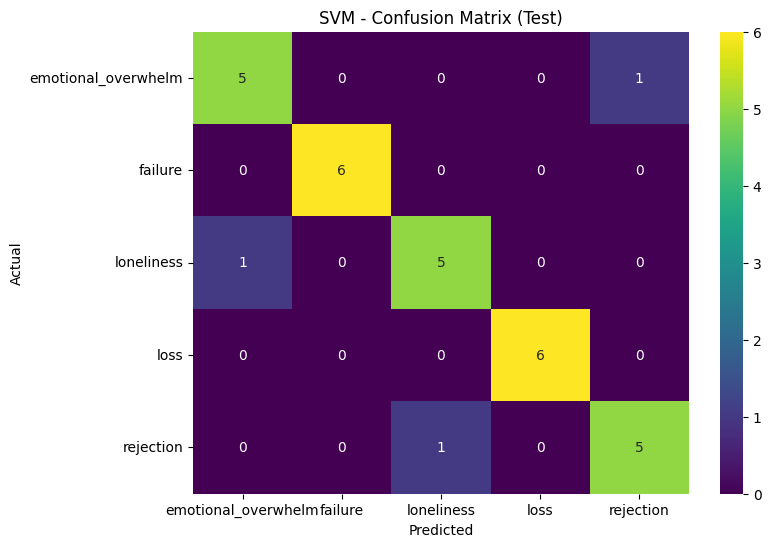

['sadness_encoder.pkl']

In [ ]:
# Sadness Model
model, encoder = train_svm_classifier(
    dataset_path="sadness_dataset.csv",
    text_col="sadness_text",
    label_col="sadness_label"
)
# Save model
joblib.dump(model, "sadness_model.pkl")
# Save label encoder
joblib.dump(encoder, "sadness_encoder.pkl")

Train: 139, Val: 30, Test: 30
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.8849830403946962

Classification Report (Test Set):
                    precision    recall  f1-score   support

       frustration       0.55      1.00      0.71         6
         injustice       1.00      0.83      0.91         6
passive_aggression       1.00      0.67      0.80         6
              rage       1.00      0.67      0.80         6
        resentment       0.83      0.83      0.83         6

          accuracy                           0.80        30
         macro avg       0.88      0.80      0.81        30
      weighted avg       0.88      0.80      0.81        30



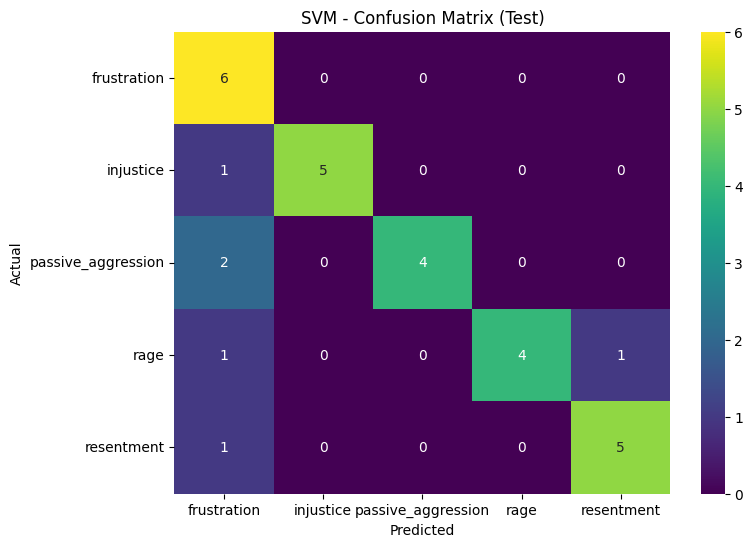

['anger_encoder.pkl']

In [ ]:
# Anger Model
model, encoder = train_svm_classifier(
    dataset_path="anger_dataset.csv",
    text_col="anger_text",
    label_col="anger_label"
)
# Save model
joblib.dump(model, "anger_model.pkl")
# Save label encoder
joblib.dump(encoder, "anger_encoder.pkl")

Train: 140, Val: 30, Test: 30
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.7926302806043787

Classification Report (Test Set):
                     precision    recall  f1-score   support

     fear_of_future       1.00      0.67      0.80         6
  generalized_worry       0.67      1.00      0.80         6
     health_anxiety       1.00      1.00      1.00         6
performance_anxiety       1.00      0.67      0.80         6
     social_anxiety       0.86      1.00      0.92         6

           accuracy                           0.87        30
          macro avg       0.90      0.87      0.86        30
       weighted avg       0.90      0.87      0.86        30



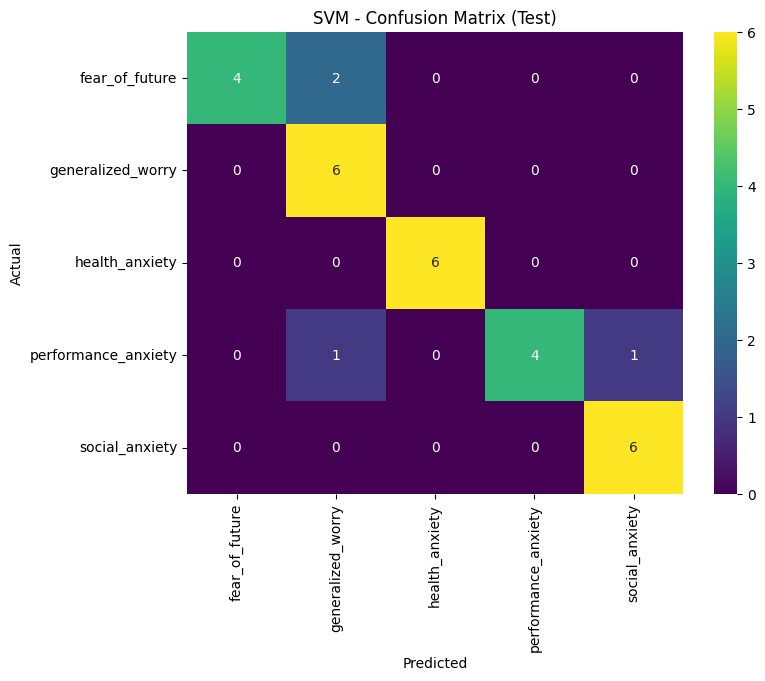

['anxiety_encoder.pkl']

In [ ]:
# Anxiety Model
model, encoder = train_svm_classifier(
    dataset_path="anxiety_dataset.csv",
    text_col="anxiety_text",
    label_col="anxiety_label"
)
# Save model
joblib.dump(model, "anxiety_model.pkl")
# Save label encoder
joblib.dump(encoder, "anxiety_encoder.pkl")

Train: 113, Val: 24, Test: 25
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.8850165955429112

Classification Report (Test Set):
                                precision    recall  f1-score   support

 desire_to_improve_make_amends       1.00      1.00      1.00         6
moral_religious_accountability       1.00      1.00      1.00         7
personal_responsibility_regret       1.00      1.00      1.00         6
            relationship_guilt       1.00      1.00      1.00         6

                      accuracy                           1.00        25
                     macro avg       1.00      1.00      1.00        25
                  weighted avg       1.00      1.00      1.00        25



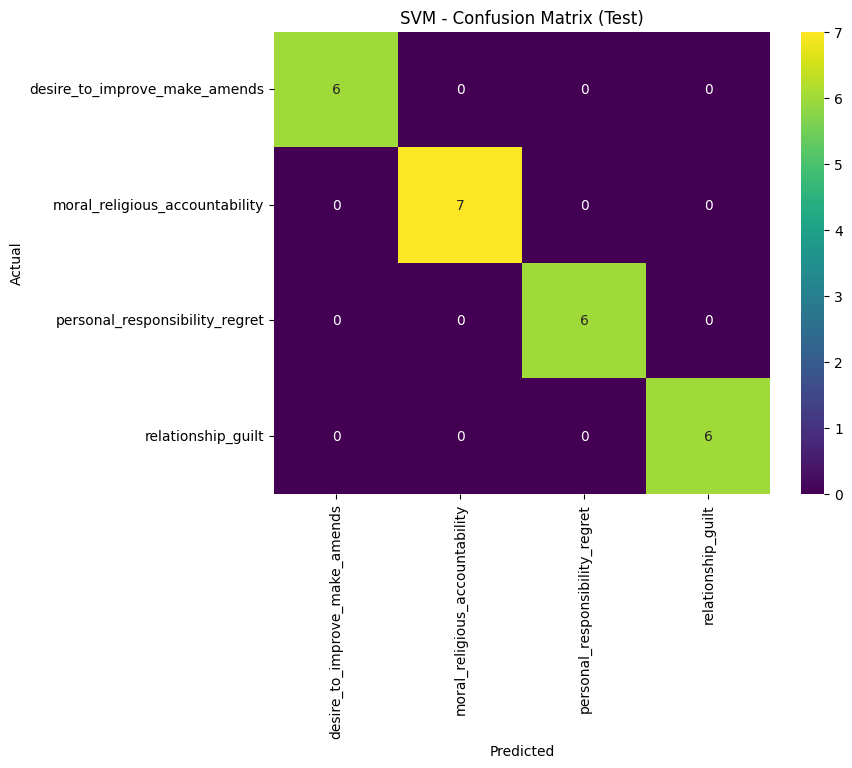

['guilt_encoder.pkl']

In [ ]:
# Guilt Model
model, encoder = train_svm_classifier(
    dataset_path="guilt_dataset.csv",
    text_col="guilt_text",
    label_col="guilt_label"
)
# Save model
joblib.dump(model, "guilt_model.pkl")
# Save label encoder
joblib.dump(encoder, "guilt_encoder.pkl")

Train: 149, Val: 32, Test: 32
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.7790476190476191

Classification Report (Test Set):
              precision    recall  f1-score   support

 contentment       0.86      1.00      0.92         6
  excitement       1.00      0.86      0.92         7
   gratitude       0.83      0.71      0.77         7
        love       1.00      1.00      1.00         6
       pride       0.86      1.00      0.92         6

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32



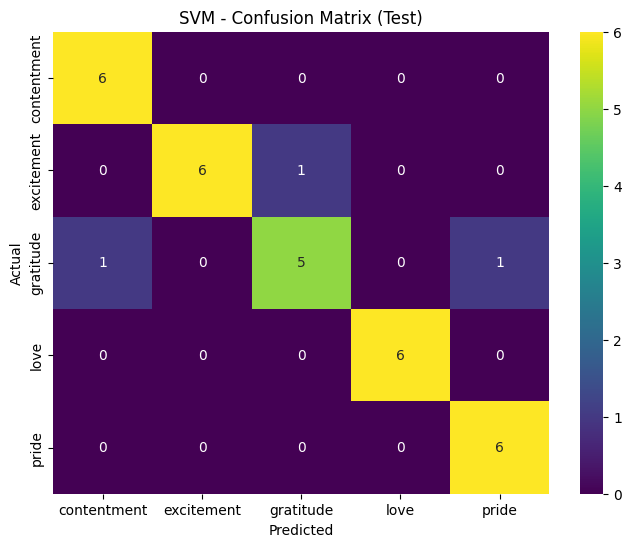

['joy_encoder.pkl']

In [ ]:
# Joy Model
model, encoder = train_svm_classifier(
    dataset_path="joy_dataset.csv",
    text_col="joy_text",
    label_col="joy_label"
)
# Save model
joblib.dump(model, "joy_model.pkl")
# Save label encoder
joblib.dump(encoder, "joy_encoder.pkl")

Train: 139, Val: 30, Test: 30
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.6837804502004317

Classification Report (Test Set):
                            precision    recall  f1-score   support

expectation_relief_success       0.80      0.67      0.73         6
                     faith       0.83      0.83      0.83         6
                  optimism       0.86      1.00      0.92         6
                  patience       0.83      0.83      0.83         6
            personal_goals       1.00      1.00      1.00         6

                  accuracy                           0.87        30
                 macro avg       0.86      0.87      0.86        30
              weighted avg       0.86      0.87      0.86        30



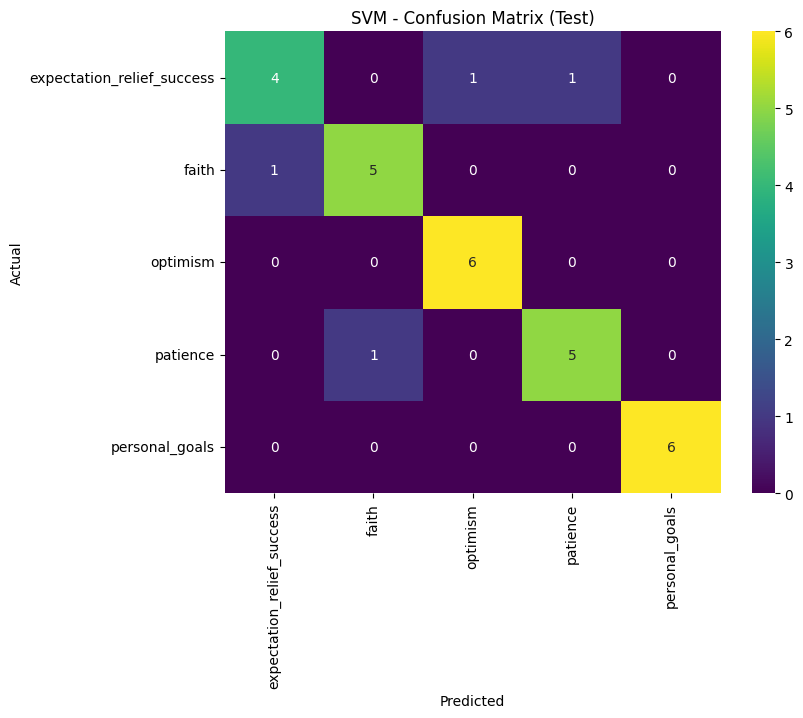

['hope_encoder.pkl']

In [ ]:
# Hope Model
model, encoder = train_svm_classifier(
    dataset_path="hope_dataset.csv",
    text_col="hope_text",
    label_col="hope_label"
)
# Save model
joblib.dump(model, "hope_model.pkl")
# Save label encoder
joblib.dump(encoder, "hope_encoder.pkl")

Train: 152, Val: 33, Test: 33
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.7831372549019607

Classification Report (Test Set):
              precision    recall  f1-score   support

       doubt       1.00      0.71      0.83         7
  indecision       1.00      1.00      1.00         7
  mental_fog       1.00      0.83      0.91         6
   overwhelm       0.78      1.00      0.88         7
 uncertainty       0.71      0.83      0.77         6

    accuracy                           0.88        33
   macro avg       0.90      0.88      0.88        33
weighted avg       0.90      0.88      0.88        33



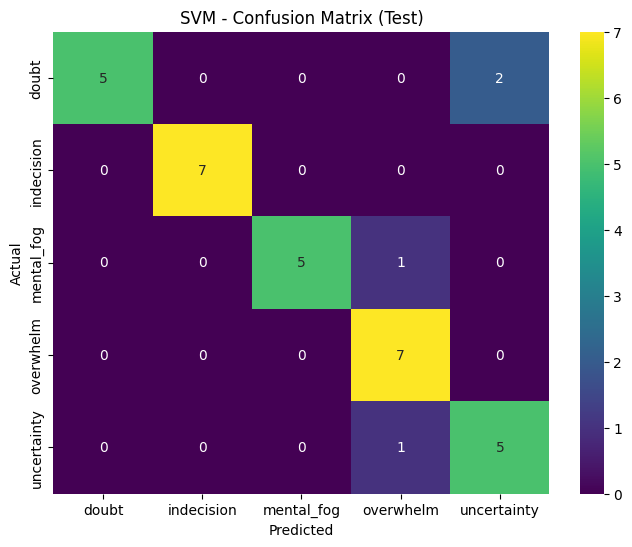

['confusion_encoder.pkl']

In [ ]:
# Confusion Model
model, encoder = train_svm_classifier(
    dataset_path="confusion_dataset.csv",
    text_col="confusion_text",
    label_col="confusion_label"
)
# Save model
joblib.dump(model, "confusion_model.pkl")
# Save label encoder
joblib.dump(encoder, "confusion_encoder.pkl")

In [ ]:
# Downloading all .pkl files
from google.colab import files

files.download("sadness_model.pkl")
files.download("sadness_encoder.pkl")

files.download("confusion_model.pkl")
files.download("confusion_encoder.pkl")

files.download("anger_model.pkl")
files.download("anger_encoder.pkl")

files.download("anxiety_model.pkl")
files.download("anxiety_encoder.pkl")

files.download("guilt_model.pkl")
files.download("guilt_encoder.pkl")

files.download("joy_model.pkl")
files.download("joy_encoder.pkl")

files.download("hope_model.pkl")
files.download("hope_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>